Use OpenAI to plot an option payoff diagram that the user describes!

Response Text: ```json
[
    {"ticker": "PLTR", "type": "put", "strike": 92, "quantity": 1, "premium": 0.14}
]
```
Parsed strategy: [{'ticker': 'PLTR', 'type': 'put', 'strike': 92, 'quantity': 1, 'premium': 0.14}]


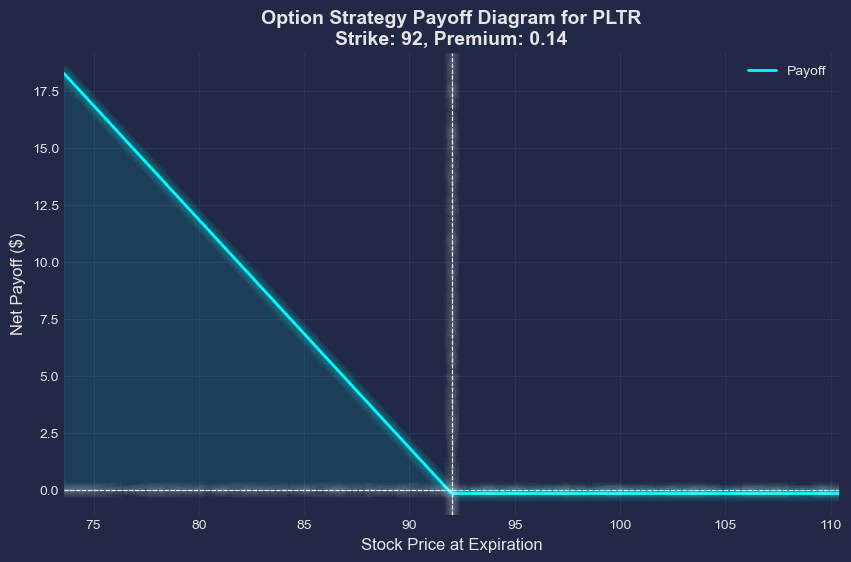

In [24]:
#Working Script
# Import Modules
from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk  # Added cyberpunk styling
from dotenv import load_dotenv
import os

# Load API key stored in .env file
load_dotenv()

client = OpenAI()

import re  # Added for removing dollar signs

def parse_option_strategy(user_input):
    # Remove dollar signs from input
    cleaned_input = re.sub(r'\$', '', user_input)

    prompt = f"""You are an expert in options trading. A user describes an option strategy. Return the structured data in JSON format with:
    - 'ticker' (the ticker symbol mentioned by the user)
    - 'type' (call/put)
    - 'strike' (strike price)
    - 'quantity' (positive for long, negative for short)
    - 'premium' (price paid or received for each option)
    
    Example:
    User: "I bought 2 AAPL calls at a $100 strike for $5 and sold 1 PG call at $110 strike for $3"
    Response: 
    [
        {{"ticker": "AAPL", "type": "call", "strike": 100, "quantity": 2, "premium": 5}},
        {{"ticker": "PG", "type": "call", "strike": 110, "quantity": -1, "premium": 3}}
    ]
    
    User: "{cleaned_input}"
    Response:
    """

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert options strategy parser."},
            {"role": "user", "content": prompt}
        ]
    )

    # Extract response text
    response_text = response.choices[0].message.content.strip()

    # Debugging: Print raw response
    print("Response Text:", response_text)

    try:
        # Remove backticks and extract JSON content
        if response_text.startswith("```json") and response_text.endswith("```"):
            response_text = response_text[7:-3].strip()  # Strip markdown formatting

        # Parse the response as JSON
        strategy = json.loads(response_text)
        return strategy
    except json.JSONDecodeError as e:
        print("Failed to decode JSON:", e)
        return []  # Return an empty list to handle errors gracefully

# Payoff calculation
def plot_payoff(strategy):
    if not strategy:
        print("No valid strategy to plot.")
        return

    # Extract ticker from the first option in the strategy (assuming all have the same ticker)
    ticker = strategy[0].get("ticker", "Unknown")  # Use "Unknown" if no ticker is provided

    # Extract strike prices
    strikes = [option["strike"] for option in strategy]  

    # Define stock price range dynamically (80%-120% of median strike)
    atm_strike = np.median(strikes)
    low, high = atm_strike * 0.8, atm_strike * 1.2
    stock_prices = np.linspace(low, high, 500)

    payoff = calculate_payoff(strategy, stock_prices)

    # Apply cyberpunk style
    plt.style.use("cyberpunk")

    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, payoff, label="Payoff", color='cyan', linewidth=2)

    # Ensure X-axis focuses only on plotted data
    plt.xlim(min(stock_prices), max(stock_prices))

    # Add grid, zero lines
    plt.axhline(0, color='white', linestyle='--', linewidth=0.8)
    plt.axvline(atm_strike, color='white', linestyle='--', linewidth=0.8)

    # Labels and title
    # Extract all strikes and premiums for display
    strike_premium_info = ", ".join(
        [f"Strike: {opt['strike']}, Premium: {opt['premium']}" for opt in strategy]
    )
    
    plt.title(f"Option Strategy Payoff Diagram for {ticker.upper()}\n{strike_premium_info}",
              fontsize=14, fontweight='bold')

    plt.xlabel("Stock Price at Expiration", fontsize=12)
    plt.ylabel("Net Payoff ($)", fontsize=12)
    plt.legend()

    # Apply cyberpunk glow effect
    mplcyberpunk.add_glow_effects()
    plt.savefig("test.png")
    plt.show()


# Test the code
stock_prices = np.linspace(50, 150, 500)  # Example range of stock prices
user_input = "I bought 1 PLTR put at a 92 strike for 0.14"
strategy = parse_option_strategy(user_input)
print("Parsed strategy:", strategy)  # Debugging step to check parsed strategy
plot_payoff(strategy)


Response Text: ```json
[
    {"type": "put", "strike": 92, "quantity": 1, "premium": 0.25}
]
```
Parsed strategy: [{'type': 'put', 'strike': 92, 'quantity': 1, 'premium': 0.25}]


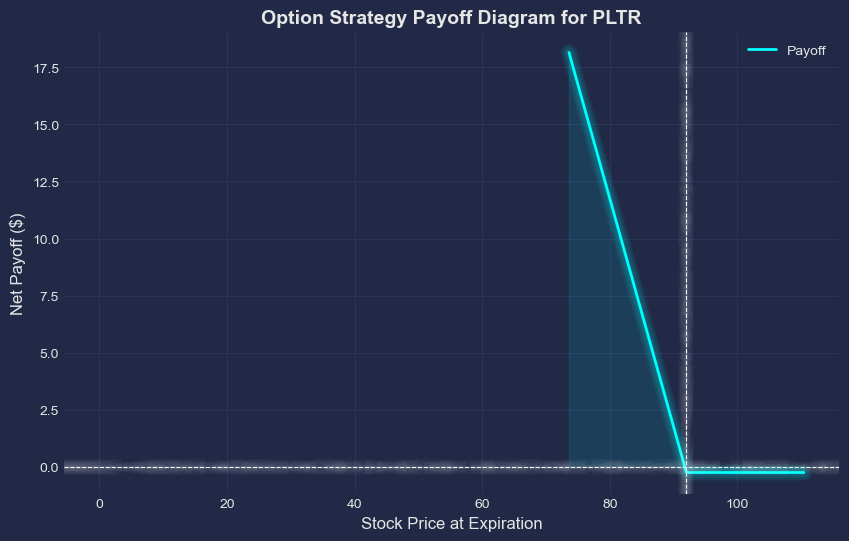

In [11]:
# Broad Scale, Less Verbose Title
# Import Modules
from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk  # Added cyberpunk styling
from dotenv import load_dotenv
import os

# Load API key stored in .env file
load_dotenv()

client = OpenAI()

# Define parsing function
def parse_option_strategy(user_input):
    prompt = f"""You are an expert in options trading. A user describes an option strategy. Return the structured data in JSON format with:
    - 'type' (call/put)
    - 'strike' (strike price)
    - 'quantity' (positive for long, negative for short)
    - 'premium' (price paid or received for each option)
    
    Example:
    User: "I bought 2 calls at a $100 strike for $5 and sold 1 call at $110 strike for $3"
    Response: 
    [
        {{"type": "call", "strike": 100, "quantity": 2, "premium": 5}},
        {{"type": "call", "strike": 110, "quantity": -1, "premium": 3}}
    ]
    
    User: "{user_input}"
    Response:
    """

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert options strategy parser."},
            {"role": "user", "content": prompt}
        ]
    )

    # Extract response text
    response_text = response.choices[0].message.content.strip()

    # Debugging: Print raw response
    print("Response Text:", response_text)

    try:
        # Remove backticks and extract JSON content
        if response_text.startswith("```json") and response_text.endswith("```"):
            response_text = response_text[7:-3].strip()  # Strip markdown formatting

        # Parse the response as JSON
        strategy = json.loads(response_text)
        return strategy
    except json.JSONDecodeError as e:
        print("Failed to decode JSON:", e)
        return []  # Return an empty list to handle errors gracefully


# Payoff calculation
def plot_payoff(strategy):
    if not strategy:
        print("No valid strategy to plot.")
        return

    # Extract strike prices
    strikes = [option["strike"] for option in strategy]  # List of strike prices

    # Define stock price range dynamically (80%-120% of median strike)
    atm_strike = np.median(strikes)  # Approximate ATM strike
    low, high = atm_strike * 0.8, atm_strike * 1.2
    stock_prices = np.linspace(low, high, 500)  # Adjusted price range

    payoff = calculate_payoff(strategy, stock_prices)

    # Apply cyberpunk style
    plt.style.use("cyberpunk")

    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, payoff, label="Payoff", color='cyan', linewidth=2)

    # Add grid, zero lines
    plt.axhline(0, color='white', linestyle='--', linewidth=0.8)
    plt.axvline(atm_strike, color='white', linestyle='--', linewidth=0.8)

    # Labels and title
    plt.title("Option Strategy Payoff Diagram for PLTR", fontsize=14, fontweight='bold')
    plt.xlabel("Stock Price at Expiration", fontsize=12)
    plt.ylabel("Net Payoff ($)", fontsize=12)
    plt.legend()

    # Apply cyberpunk glow effect
    mplcyberpunk.add_glow_effects()
    plt.show()

# Test the code
stock_prices = np.linspace(50, 150, 500)  # Example range of stock prices
user_input = "I bought 1 put at a 92 strike for $0.25"
strategy = parse_option_strategy(user_input)
print("Parsed strategy:", strategy)  # Debugging step to check parsed strategy
plot_payoff(strategy)


In [ ]:
# Super backup
# Import Modules
from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk  # Added cyberpunk styling
from dotenv import load_dotenv
import os

# Load API key stored in .env file
load_dotenv()

client = OpenAI()

import re  # Added for removing dollar signs

def parse_option_strategy(user_input):
    # Remove dollar signs from input
    cleaned_input = re.sub(r'\$', '', user_input)

    prompt = f"""You are an expert in options trading. A user describes an option strategy. Return the structured data in JSON format with:
    - 'ticker' (the ticker symbol mentioned by the user)
    - 'type' (call/put)
    - 'strike' (strike price)
    - 'quantity' (positive for long, negative for short)
    - 'premium' (price paid or received for each option)
    
    Example:
    User: "I bought 2 AAPL calls at a $100 strike for $5 and sold 1 PG call at $110 strike for $3"
    Response: 
    [
        {{"ticker": "AAPL", "type": "call", "strike": 100, "quantity": 2, "premium": 5}},
        {{"ticker": "PG", "type": "call", "strike": 110, "quantity": -1, "premium": 3}}
    ]
    
    User: "{cleaned_input}"
    Response:
    """

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert options strategy parser."},
            {"role": "user", "content": prompt}
        ]
    )

    # Extract response text
    response_text = response.choices[0].message.content.strip()

    # Debugging: Print raw response
    print("Response Text:", response_text)

    try:
        # Remove backticks and extract JSON content
        if response_text.startswith("```json") and response_text.endswith("```"):
            response_text = response_text[7:-3].strip()  # Strip markdown formatting

        # Parse the response as JSON
        strategy = json.loads(response_text)
        return strategy
    except json.JSONDecodeError as e:
        print("Failed to decode JSON:", e)
        return []  # Return an empty list to handle errors gracefully

# Payoff calculation
def plot_payoff(strategy):
    if not strategy:
        print("No valid strategy to plot.")
        return

    # Extract ticker from the first option in the strategy (assuming all have the same ticker)
    ticker = strategy[0].get("ticker", "Unknown")  # Use "Unknown" if no ticker is provided

    # Extract strike prices
    strikes = [option["strike"] for option in strategy]  

    # Define stock price range dynamically (80%-120% of median strike)
    atm_strike = np.median(strikes)
    low, high = atm_strike * 0.8, atm_strike * 1.2
    stock_prices = np.linspace(low, high, 500)

    payoff = calculate_payoff(strategy, stock_prices)

    # Apply cyberpunk style
    plt.style.use("cyberpunk")

    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, payoff, label="Payoff", color='cyan', linewidth=2)

    # Ensure X-axis focuses only on plotted data
    plt.xlim(min(stock_prices), max(stock_prices))

    # Add grid, zero lines
    plt.axhline(0, color='white', linestyle='--', linewidth=0.8)
    plt.axvline(atm_strike, color='white', linestyle='--', linewidth=0.8)

    # Labels and title
    # Extract all strikes and premiums for display
    strike_premium_info = ", ".join(
        [f"Strike: {opt['strike']}, Premium: {opt['premium']}" for opt in strategy]
    )
    
    plt.title(f"Option Strategy Payoff Diagram for {ticker.upper()}\n{strike_premium_info}",
              fontsize=14, fontweight='bold')

    plt.xlabel("Stock Price at Expiration", fontsize=12)
    plt.ylabel("Net Payoff ($)", fontsize=12)
    plt.legend()

    # Apply cyberpunk glow effect
    mplcyberpunk.add_glow_effects()
    plt.savefig("test.png")
    plt.show()


# Test the code
stock_prices = np.linspace(50, 150, 500)  # Example range of stock prices
user_input = "I bought 1 PLTR put at a 92 strike for 0.25"
strategy = parse_option_strategy(user_input)
print("Parsed strategy:", strategy)  # Debugging step to check parsed strategy
plot_payoff(strategy)

Response Text: ```json
[
    {"type": "call", "strike": 80, "quantity": 1, "premium": 0.5}
]
```
Failed to decode JSON: Expecting value: line 1 column 1 (char 0)
Parsed strategy: []


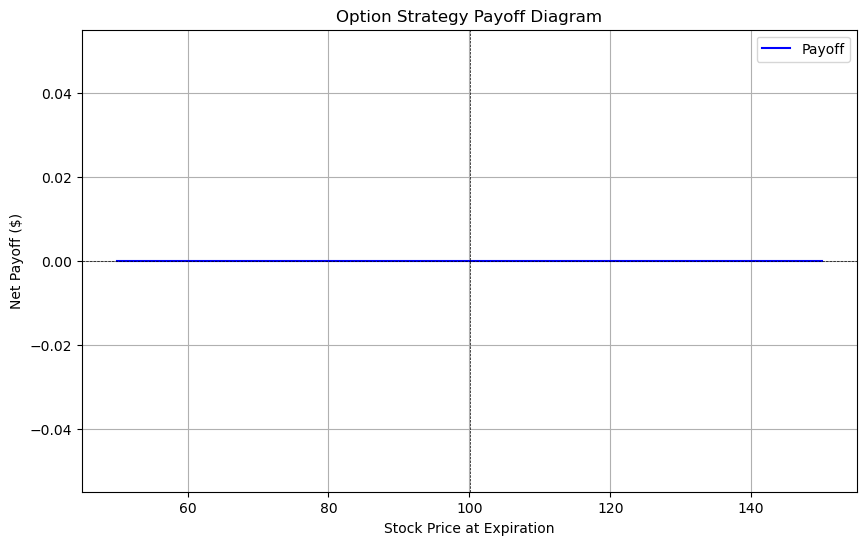

In [6]:
# Raw Starting Script / Serves As A Baseline Only
# ***WARNING*** BREAKS AND HAS FORMATTING ISSUES
#Import Modules
from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

# Load API key stored in .env file
load_dotenv()

client = OpenAI()

# Define parsing function
def parse_option_strategy(user_input):
    prompt = f"""You are an expert in options trading. A user describes an option strategy. Return the structured data in JSON format with:
    - 'type' (call/put)
    - 'strike' (strike price)
    - 'quantity' (positive for long, negative for short)
    - 'premium' (price paid or received for each option)
    
    Example:
    User: "I bought 2 calls at a $100 strike for $5 and sold 1 call at $110 strike for $3"
    Response: 
    [
        {{"type": "call", "strike": 100, "quantity": 2, "premium": 5}},
        {{"type": "call", "strike": 110, "quantity": -1, "premium": 3}}
    ]
    
    User: "{user_input}"
    Response:
    """
    
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert options strategy parser."},
            {"role": "user", "content": prompt}
        ]
    )
    
    # Debugging: Print the raw response
    response_text = response.choices[0].message.content.strip()
    print("Response Text:", response_text)  # Check what the response looks like

    try:
        # Parse the response as JSON
        strategy = json.loads(response_text)
        return strategy
    except json.JSONDecodeError as e:
        print("Failed to decode JSON:", e)
        return []  # Return an empty list or handle this case as needed



# Payoff calculation
def calculate_payoff(strategy, stock_prices):
    payoff = np.zeros_like(stock_prices)
    
    for option in strategy:
        if option["type"] == "call":
            intrinsic = np.maximum(stock_prices - option["strike"], 0)
        elif option["type"] == "put":
            intrinsic = np.maximum(option["strike"] - stock_prices, 0)
        
        payoff += option["quantity"] * (intrinsic - option["premium"])
    
    return payoff

# Plot payoff diagram
def plot_payoff(strategy, stock_prices):
    payoff = calculate_payoff(strategy, stock_prices)
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, payoff, label="Payoff", color='blue')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(stock_prices[len(stock_prices) // 2], color='black', linestyle='--', linewidth=0.5)
    plt.title("Option Strategy Payoff Diagram")
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Net Payoff ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Test the code
stock_prices = np.linspace(50, 150, 500)  # Example range of stock prices
user_input = "I bought 1 call at a $80 strike for $0.5"
strategy = parse_option_strategy(user_input)
print("Parsed strategy:", strategy)  # Debugging step to check parsed strategy
plot_payoff(strategy, stock_prices)
